# DATA SCIENCE GUIDED CAPSTONE PROJECT

The West Nile Virus, a single stranded RNA virus, is known to spread amongst mosquitos.  According to the CDC, It is the leading cause of mosquito-borne disease in the United States. Though fatality is minimal, 1 of 5 people face its symptoms each year. 

Chicago Public Health Workers each year set traps around the city to collect mosquitos and test whether the virus is present in them or not. From 2011-2013, the city of Chicago sprayed its mosquitos so that the number of mosquitos and the virus presence could decrease. The goal is to determine the percentage of its mosquitos containing the West Nile Virus for a given time and location and whether there is a correlation between spraying and virus presence. 


In [411]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [412]:
#open the file 
df = pd.read_csv('train.csv')
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [413]:
#get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [414]:
#find dataset shape
df.shape

(10506, 12)

In [415]:
#determine number of missing values in each column
null_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
null_values.columns=['Count', '%']
null_values.sort_values(by='Count')
null_values

,Count,%
Date,0,0.0
Address,0,0.0
Species,0,0.0
Block,0,0.0
Street,0,0.0
Trap,0,0.0
AddressNumberAndStreet,0,0.0
Latitude,0,0.0
Longitude,0,0.0
AddressAccuracy,0,0.0


No null or missing values are present in this data

#### Analyze the dates in which mosquitoes were collected

In [346]:
df['Date'].unique()
np.count_nonzero(df['Date'].unique())

95

In [347]:
df_date = df['Date'].value_counts()
df_date

2007-08-01    551
2007-08-15    276
2007-08-24    186
2007-08-21    186
2013-08-01    186
             ... 
2007-10-09     26
2007-05-29     25
2007-09-25     23
2009-06-03     14
2007-08-03      5
Name: Date, Length: 95, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Count'>

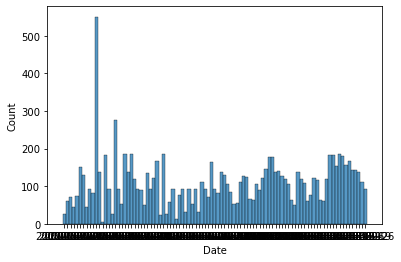

In [348]:
sns.histplot(data = df_date, x=df['Date'], bins=100)

#### Analyze locations of where mosquitoes were trapped 

In [350]:
df['Block'].unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34])

In [351]:
df['Street'].unique()

array([' N OAK PARK AVE', ' N MANDELL AVE', ' W FOSTER AVE',
       ' W WEBSTER AVE', ' W GRAND AVE', ' W ROOSEVELT', ' W CHICAGO',
       ' N STAVE ST', ' N CANNON DR', ' W 113TH ST', ' S PEORIA ST',
       ' W 95TH ST', ' W 89TH ST', ' N STREETER DR', ' N OAKLEY AVE',
       ' N LONG AVE', ' S CARPENTER ST', ' W HIGGINS AVE',
       ' N PITTSBURGH AVE', ' N OKETO AVE', ' N CALIFORNIA AVE',
       ' W BALMORAL AVE', ' N WESTERN AVE', ' S CENTRAL AVE',
       ' N HUMBOLDT DR', ' S VINCENNES', ' S ASHLAND AVE', ' S STATE ST',
       ' W 127TH PL', ' W AGATITE AVE', ' N AUSTIN AVE',
       ' N ASHLAND AVE OVERPASS', ' N RICHMOND ST', ' N FRANCISCO AVE',
       ' W GRANVILLE AVE', ' W FARWELL AVE', '  W ARMITAGE AVENUE',
       ' S MILLARD AVE', ' N LAWLER AVE', ' W 116TH ST',
       ' S DR MARTIN LUTHER KING JR DR', ' N KEDVALE AVE',
       ' N CAMPBELL AVE', ' N TRIPP AVE', ' N MILWAUKEE AVE',
       ' N AVONDALE AVE', ' N MOSELL AVE', ' N LEMONT AVE',
       ' S WESTERN AVE', ' W BELDE

In [352]:
np.count_nonzero(df['Block'].unique())

64

In [353]:
np.count_nonzero(df['Street'].unique())

128

In [354]:
np.count_nonzero(df['Address'].unique())

138

In [355]:
df['AddressAccuracy'].unique() # On a scaled of 0-9 where 9 is the most accurate and 0 is the least accurate

array([9, 8, 5, 3])

#### Analyze the prescence of the West Nile Virus
1 is denoted as the virus present and 0 is denoted as the virus is not present

In [356]:
df['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [357]:
#calcualte the percentage of virus
(551/10506)*100

5.244622120692937

In [358]:
data_mos_count = df['NumMosquitos'].value_counts()

<AxesSubplot:xlabel='NumMosquitos', ylabel='Count'>

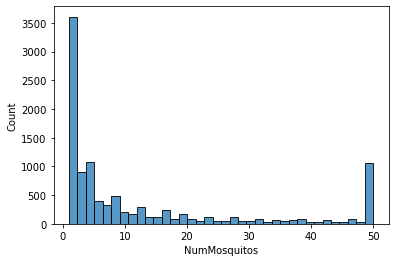

In [359]:
sns.histplot(data = data_mos_count, x=df['NumMosquitos'])

#### Analyze the different species of the West Nile Virus

In [360]:
df['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [361]:
df[(df['Species'] == 'CULEX PIPIENS/RESTUANS') & (df['NumMosquitos'] == 1)].count()
773/4752*100

16.266835016835017

In [362]:
df[(df['Species'] == 'CULEX RESTUANS') & (df['NumMosquitos'] == 1)].count()
770/2740*100

28.102189781021895

In [363]:
df[(df['Species'] == 'CULEX PIPIENS') & (df['NumMosquitos'] == 1)].count()
545/2699*100

20.192663949610967

In [364]:
df[(df['Species'] == 'CULEX TERRITANS') & (df['NumMosquitos'] == 1)].count()
153/222*100

68.91891891891892

In [365]:
df[(df['Species'] == 'CULEX SALINARIUS') & (df['NumMosquitos'] == 1)].count()
61/86*100

70.93023255813954

In [366]:
df[(df['Species'] == 'CULEX TARSALIS') & (df['NumMosquitos'] == 1)].count()
5/6*100

83.33333333333334

In [367]:
df[(df['Species'] == 'CULEX ERRATICUS') & (df['NumMosquitos'] == 1)].count()
0/1*100

0.0

#### Look into the Weather Data

In [368]:
weather = pd.read_csv('weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [369]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [370]:
weather.shape

(2944, 22)

In [371]:
weather['Tavg'].value_counts()
weather['Tavg'] = weather['Tavg'].replace('M',67)
weather['Tavg'] = weather['Tavg'].astype(int)

In [332]:
weather['Tavg'].mean()

66.98879076086956

<AxesSubplot:xlabel='Date', ylabel='Tavg'>

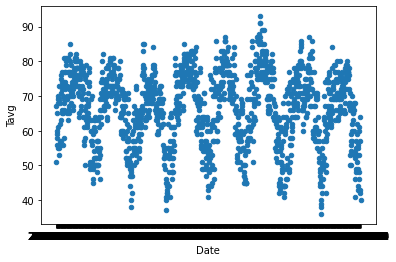

In [374]:
station_one = pd.DataFrame(weather[(weather['Station'] == 1)])
station_one.plot.scatter(x='Date', y='Tavg')

<AxesSubplot:xlabel='Date', ylabel='Tavg'>

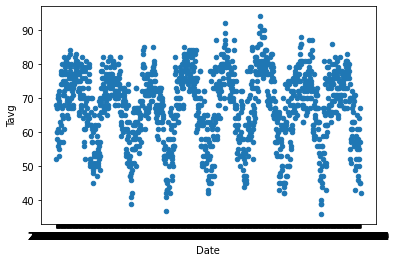

In [375]:
station_two = weather[(weather['Station'] == 2)]
station_two.plot.scatter(x='Date', y='Tavg')

In [197]:
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [221]:
weather['Date'].value_counts()

2011-06-04    2
2008-09-18    2
2013-07-19    2
2010-06-08    2
2014-07-28    2
             ..
2013-06-03    2
2011-06-03    2
2007-09-07    2
2011-08-15    2
2014-10-30    2
Name: Date, Length: 1472, dtype: int64

In [405]:
df_virus = df[df['NumMosquitos'] == 1]
virus_dates = df_virus['Date'].unique()

## Conclusion

Present findings show:
- that out of the 10506 mosquitoes  caught, only 551 actually contained the virus, 5% of the actual collections
- majority of the mosquitoes was collected in August 1, 2007
- about 4572 mosquitoes were of CULEX PIPIENS/RESTUANS and out of them, sbout 16% of them contained the West Nile Virus
- Mosquitoes were collected on 95 different day, 138 different location in the city of Chicago

To Explore:
- Which locations in Chicago present the most mosquitoes containing the virus
- Is there a correlation between the weather and viral presence
